[[[1058.3739013671875, 252.4451904296875, 1122.5819091796875, 342.57305908203125, 0.5845561027526855, 41, 'cup', [1090, 297, 0.05039228295819936]]], [[1056.5667724609375, 253.27871704101562, 1124.6578369140625, 343.2101135253906, 0.537558913230896, 41, 'cup', [1090, 298, 0.05114882506527415]]], [[1055.71337890625, 256.9166259765625, 1117.058349609375, 344.05340576171875, 0.5598624348640442, 41, 'cup', [1086, 300, 0.04766423357664234]]], [[1053.917724609375, 259.821533203125, 1116.1962890625, 345.96685791015625, 0.740460991859436, 41, 'cup', [1085, 302, 0.047577413479052824]]], [[1051.457763671875, 261.213623046875, 1110.647216796875, 346.1380615234375, 0.827299952507019, 41, 'cup', [1081, 303, 0.047897310513447436]]], [[1047.804443359375, 261.01080322265625, 1109.329833984375, 347.2928466796875, 0.862343966960907, 41, 'cup', [1078, 304, 0.04807361963190184]]], [[1045.5274658203125, 261.1412658691406, 1108.5802001953125, 347.7228088378906, 0.8425992727279663, 41, 'cup', [1077, 304, 0.04

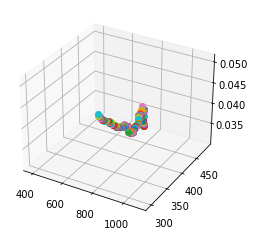

array([[1.09000000e+03, 2.97000000e+02, 5.03922830e-02],
       [1.09000000e+03, 2.98000000e+02, 5.11488251e-02],
       [1.08600000e+03, 3.00000000e+02, 4.76642336e-02],
       [1.08500000e+03, 3.02000000e+02, 4.75774135e-02],
       [1.08100000e+03, 3.03000000e+02, 4.78973105e-02],
       [1.07800000e+03, 3.04000000e+02, 4.80736196e-02],
       [1.07700000e+03, 3.04000000e+02, 4.78680513e-02],
       [1.07600000e+03, 3.05000000e+02, 5.11154599e-02],
       [1.07600000e+03, 3.05000000e+02, 4.81622618e-02],
       [1.07700000e+03, 3.05000000e+02, 4.95009476e-02],
       [1.07100000e+03, 3.06000000e+02, 5.08171206e-02],
       [1.06900000e+03, 3.07000000e+02, 5.03598972e-02],
       [1.06700000e+03, 3.07000000e+02, 4.81622618e-02],
       [1.06500000e+03, 3.08000000e+02, 4.81622618e-02],
       [1.06200000e+03, 3.09000000e+02, 4.97839898e-02],
       [1.06000000e+03, 3.09000000e+02, 4.81622618e-02],
       [1.05900000e+03, 3.09000000e+02, 5.13836066e-02],
       [1.05800000e+03, 3.10000

In [174]:
from src.kalman import Kalman as Kalman
import numpy as np
import pickle
import matplotlib.pyplot as plt

results = []
with open('measurements_kalman_testing.pkl', 'rb') as f:
    results = pickle.load(f)
    # while True:
    #     print('it 1')
    #     try:
    #         results.append(pickle.load(f))
    #     except EOFError:
    #         break

print(results)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

measurements = np.zeros((len(results), 3))
v = (np.array([results[-50][0][7]]) - np.array([results[0][0][7]]))[0] / 130
# print(results)
for i in range(0,len(results)):
    if len(results [i]):
        
        if len(np.array(results[i][0][7])):
            x = np.array(results[i][0][7])
        else:
            x = np.array([[0,0,0]])
        measurements[i] = np.array(x)
        ax.plot(x[0],x[1],x[2],'o',label='measurement')
measurements
plt.show()

measurements


180

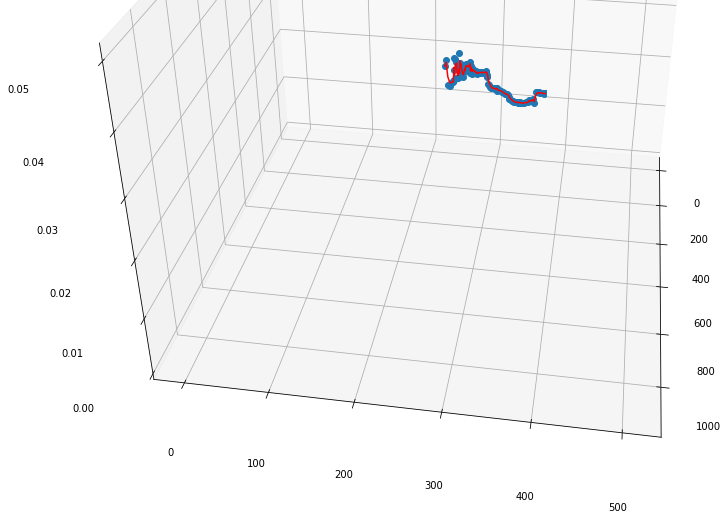

In [171]:
r_xy = 1
r_z = 1
x_init = measurements[0]




P_init = np.eye(3)
Q_init = np.eye(3)
R_init = np.array([[r_xy,0,0],[0,r_xy,0],[0,0,r_z]])

kalman = Kalman(measurements.T, v, x_init, P_init, R_init)



kalman_estimates = kalman.positionUpdate()

kalman_estimates = kalman_estimates.T

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.dist = 3
ax.azim = 9
ax.plot(measurements.T[0],measurements.T[1],measurements.T[2],'o',label='measurement')

# ax.plot(model[0],model[1],model[2],'-',label='model')

ax.plot(kalman_estimates[0],kalman_estimates[1],kalman_estimates[2],'-',label='kalman_estimates',color='red')
len(kalman_estimates[0])